## **Time series Analysis **

1. A time series is a sequence where a metric is recorded over regular time intervals.
2. A time series (x₁, …, xₑ) is assumed to be a sequence of real values taken at successive equally spaced points in time, from time t=1 to time t=e.
3. Depending on the frequency, a time series can be of yearly (ex: annual budget), quarterly (ex: expenses), monthly (ex: air traffic), weekly (ex: sales qty), daily (ex: weather), hourly (ex: stocks price), minutes (ex: inbound calls in a call canter) and even seconds wise (ex: web traffic).
4. Forecasting is the final step where you want to predict the future values the series is going to take.


For a deailed information on Time series, you can go through this link.

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values. Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post. We will demonstrate different approaches for forecasting electric consumption time series. 


In [1]:
# required pacakges to be imported
import pandas as pd
import matplotlib as plt
import numpy as np
from pandas import DataFrame
from datetime import date
from matplotlib import style
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
import math
# importing the dataset from local storage
#data = pd.read_csv("C:\\Users\\KANDIRAJU\\Downloads\\time-series-datasets\\Electric_Production.csv")
#data.head()
data = pd.read_csv("../input/Electric_Production.csv")
data.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


**Pandas** : Pandas is an open source library, providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. What’s cool about Pandas is that,  it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called Data frame that looks very similar to table in a statistical software (think Excel or SPSS for example).

**Numpy** : Numpy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.

**Matplotlib** : matplotlib.pyplot is a plotting library used for 2D graphics in python programming language. It can be used in python scripts, shell, web application servers and other graphical user interface toolkits. It supports a very wide variety of graphs and plots namely - histogram, bar charts, power spectra, error charts etc. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab.





In [2]:
# renaming the column names as per my convenience ( this is optional if you wish to perform) 
data.rename(columns = {'DATE' : 'date', 'Value' : 'value'}, inplace=True)
data.head()

,date,value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


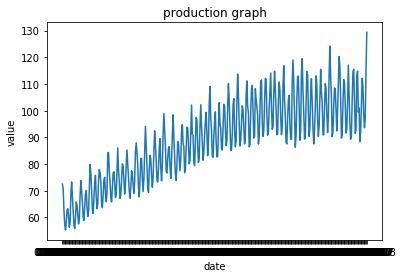

In [3]:
# to plot a graph, index has to be set. it is not possible to plot the graph without index.
data.set_index('date', inplace=True)
data.head()
plt.xlabel("date")
plt.ylabel("value")
plt.title("production graph")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.plot(data); 
# we will notice that the x axis is messed up, this is because, it plotted all the date points and the numbers got overlapped.

**Determining the rolling mean
**


Rolling mean or avergae is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean 

The reason why the window is considered as 12 beacuse, we have to calculate the mean for every one year which is for 12 months from this data we see that we have only the first month data of every yearto make it as an year, we consider all the 1st month of every year and count them to 12 months which makes one year.

Calculation of rolling mean : since the window is 12 ( 12 months ) the values of top 11 months are considered and you will get NaN values for the top 12.

In [4]:
rolmean = data.rolling(window=12).mean()
print(rolmean.head(20))

                value
date                 
01-01-1985        NaN
02-01-1985        NaN
03-01-1985        NaN
04-01-1985        NaN
05-01-1985        NaN
06-01-1985        NaN
07-01-1985        NaN
08-01-1985        NaN
09-01-1985        NaN
10-01-1985        NaN
11-01-1985        NaN
12-01-1985  62.165667
01-01-1986  62.232375
02-01-1986  62.008617
03-01-1986  61.989608
04-01-1986  61.953067
05-01-1986  61.994617
06-01-1986  62.145458
07-01-1986  62.407567
08-01-1986  62.510325


As discussued above, we got some NaN values, this is because, as we are claculating the mean for every 12 months Hence it takes the values of first 12 months and that is the reason why the first 11 months are NaN. It depends on how many months you want to calculate. Based on that, you can take the window size.

**Determining the standard deviation**

Standard deviation is the measure of dispersion of a set of data from its mean. It measures the absolute variability of a distribution


In [5]:
std = data.rolling(window=12).std()
print(std.head(20))

               value
date                
01-01-1985       NaN
02-01-1985       NaN
03-01-1985       NaN
04-01-1985       NaN
05-01-1985       NaN
06-01-1985       NaN
07-01-1985       NaN
08-01-1985       NaN
09-01-1985       NaN
10-01-1985       NaN
11-01-1985       NaN
12-01-1985  5.746613
01-01-1986  5.880632
02-01-1986  5.573367
03-01-1986  5.572113
04-01-1986  5.605773
05-01-1986  5.553706
06-01-1986  5.461847
07-01-1986  5.561265
08-01-1986  5.589537


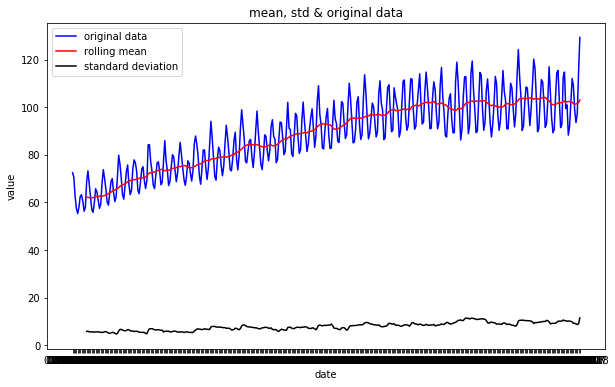

In [6]:
# plot rolling statistics
original_data = plt.plot(data, color='blue',label='original data')
mean = plt.plot(rolmean,color ='red',label='rolling mean')
std = plt.plot(std,color ='black',label='standard deviation')
plt.title("mean, std & original data")
plt.xlabel("date")
plt.ylabel("value")
plt.legend()
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.show(block =False)

We see that the data is not stationary, in order to check the stationarity, perform dickey fuller test. Before doing that, let us understand what Stationarity is all about.

**Stationarity : An important module in time series analyis. **

A time series has stationarity if a shift in time doesn’t cause a change in the shape of the distribution. Basic properties of the distribution like the mean , variance and covariance are constant over time. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality).


## **ADF (Augmented Dickey Fuller) Test**



The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

**Null Hypothesis:** The series has a unit root (value of a =1)

**Alternate Hypothesis:** The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).

For further information on ADCF, you can refer this article.

https://www.stata.com/manuals13/tsdfuller.pdf

In [7]:
# perform dickey fuller test (ADFT)
from statsmodels.tsa.stattools import adfuller 
adft = adfuller(data['value'],autolag='AIC')
# output for dft will give us without defining what the values are.
#hence we manually write what values does it explains using a for loop
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in adft[4].items():
    output['critical value (%s)'%key] =  values
print(output)

Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


We see that the p value is greater than 0.05 so we cannot reject the **Null hypothesis**. Also the test statistics is greater  than the critical values. so the data is non stationary

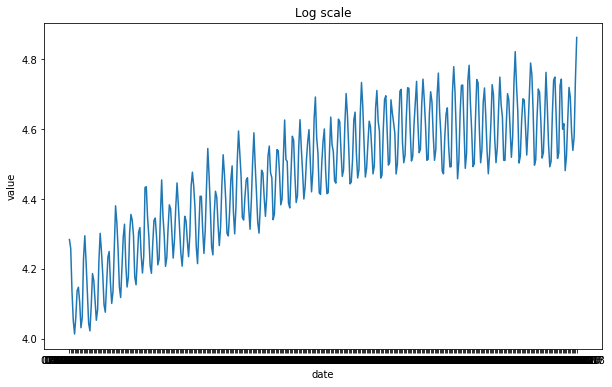

In [8]:
data_logscale = np.log(data)
# logarithmic function is used to scale the data to a certain extent.
plt.plot(data_logscale)
plt.title("Log scale")
plt.xlabel("date")
plt.ylabel("value")
#plt.legend()
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.show(block =False)

We see the spread of the data evenly compaered to the mean of the data. The scale on the y axis changed as we have taken the log of it. But still data is not stationary

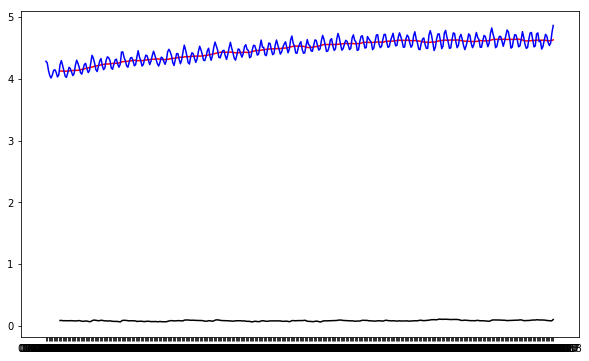

In [9]:
#determining the rolling mean(average) for the log data. Perform the same steps which are performed on the data before.
moving_average = data_logscale.rolling(window=12).mean()
#print(rolmean_log)
#determining the standard deviation ( same steps! )
std_dev = data_logscale.rolling(window=12).std()
#print(std_log)
plt.plot(moving_average, color='red')
plt.plot(data_logscale, color='blue')
plt.plot(std_dev, color='black');

Now substrcting the log scale with the moving average. There is nothing specific to perform this subtraction. You can even try by changing the logarithmic function.
As the data is not stationary, this is one of the steps to perform the test to ensure that the data is stationary




In [10]:
movingavg_logscale = data_logscale - moving_average
movingavg_logscale.head(15)

,value
date,
01-01-1985,NaN
02-01-1985,NaN
03-01-1985,NaN
04-01-1985,NaN
05-01-1985,NaN
06-01-1985,NaN
07-01-1985,NaN
08-01-1985,NaN
09-01-1985,NaN


Previously if we observe, the mean and std has high values and hence there was a spread in the data, now as we have sclaed the data, the values are relatively to the same scale. Let's drop the NaN values which make the data noise.

In [11]:
movingavg_logscale.dropna(inplace=True)
movingavg_logscale.head(10)

,value
date,
12-01-1985,0.103961
01-01-1986,0.167724
02-01-1986,0.095629
03-01-1986,0.007329
04-01-1986,-0.079115
05-01-1986,-0.101472
06-01-1986,-0.033363
07-01-1986,0.055963
08-01-1986,0.034639


Perform dickey fuller test (ADFT) once again. This is the actual code for dickey fuller test. We have to perform this function everytime to check whether the data is stationary or not.

We define a function to test the stationarity with respect to time, hence we take timeseries. The reason to define it in the form of a function is because, this function can be used in the coming ADCF tests as well. It becomes easy to use the same function and check the stationarity rather then writing the code again and again.

In [12]:

from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
    
    #determining the rolling statistics for timeseries
    
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plotting the rolling statistics for timeseries
    
    timeseries_original =plt.plot(timeseries, color='blue',label = 'original graph')
    timeseries_mean =plt.plot(movingAverage, color='red',label = 'movingAverage')
    timeseries_std =plt.plot(movingSTD, color='black',label = 'movingSTD')
    plt.legend(loc='best')
    plt.title("rolling mean & standard deviation of timeseries")
    plt.show(block=False)
    
    #perform dickey fuller test
    
    print("results of dickey fuller test")
    adft = adfuller(data['value'],autolag='AIC')
    
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

After defining the function, use the movingavg_logscale which is subtracted from 2 values in the above cell. You can use any function call by taking the difference or the using different log to remove the stationarity

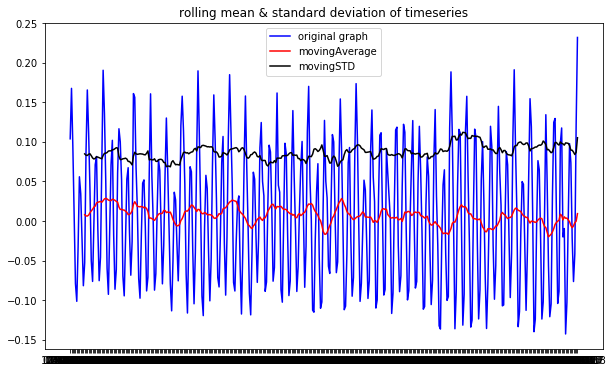

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
# we are going to use the function here.
test_stationarity(movingavg_logscale)

From the above graph we observed that the data attained stationartiy. We also see that the test statistics and critial value is relatively equal

One of the module is completed as we came to a conclusion. We need to check the weighted average, to understand the trend of the data in timeseries. Take the previous log data nd perform the following operation.

In [14]:
print(data_logscale.head())

               value
date                
01-01-1985  4.283658
02-01-1985  4.258049
03-01-1985  4.134369
04-01-1985  4.051287
05-01-1985  4.013046


In [15]:
weighted_average = data_logscale.ewm(halflife=12, min_periods=0,adjust=True).mean()
print(weighted_average.head())

               value
date                
01-01-1985  4.283658
02-01-1985  4.270484
03-01-1985  4.222468
04-01-1985  4.175897
05-01-1985  4.139460


The exponential moving average (EMA) is a weighted average of the last n prices, where the weighting decreases exponentially with each previous price/period. In other words, the formula gives recent prices more weight than past prices.



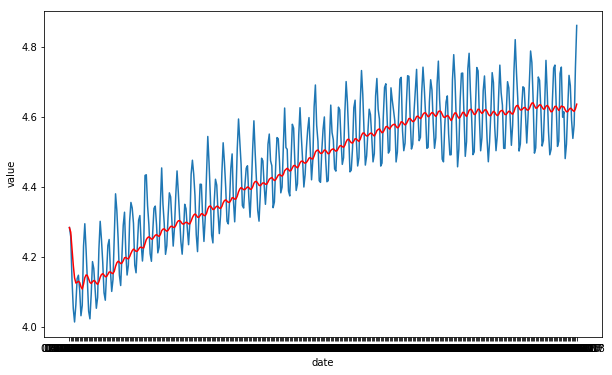

In [16]:

plt.plot(data_logscale)
plt.plot(weighted_average, color='red')
plt.xlabel("date")
plt.ylabel("value")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
#plt.legend()
plt.show(block =False)

Previously we subtracted data_logscale with moving average, now take the same log_scale and subtract with weighted_average


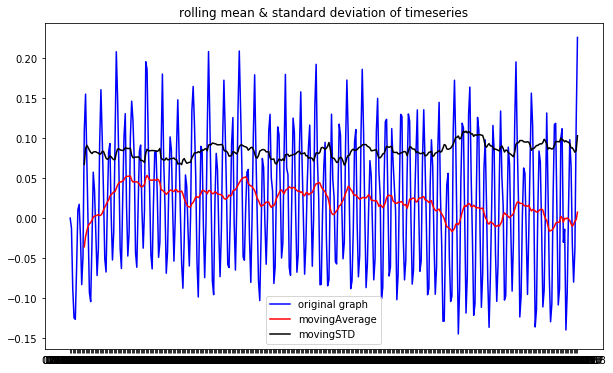

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [17]:
logScale_weightedMean = data_logscale-weighted_average
# use the same function defined above and pass the object into it.
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

# ARIMA Model

**ARIMA**, short for **‘Auto Regressive Integrated Moving Average’** is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any ‘**non-seasonal**’ time series that exhibits patterns and is not a random white noise can be modeled with **ARIMA** models.

An **ARIMA** model is characterized by 3 terms: p, d, q

where,

**AR:** Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations. ( t, t-1, t-2). It checks whethere there is any auto corelation between these time periods.

**I:** Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

**MA:** Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. More precisely, this part helps to remove the noise data in the process of analysis.

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. More on that once we finish **ARIMA**.

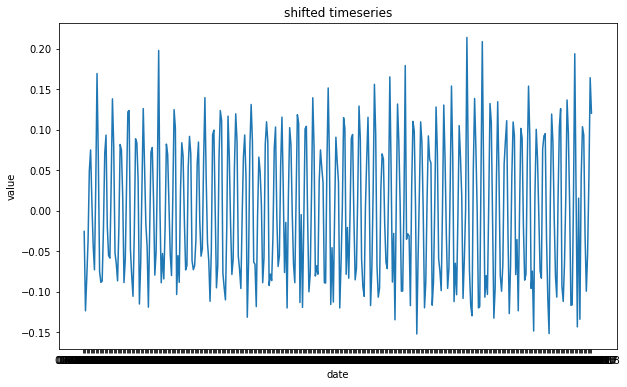

In [18]:
data_log_shift = data_logscale - data_logscale.shift()
plt.xlabel("date")
plt.ylabel("value")
plt.title("shifted timeseries")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.plot(data_log_shift);

Over here, the time series is shifted by 1, which means, the time is differentiated by 1 ( finding the 'd' value). In ARIMA model, I stands for integration and that's what we calculated here.

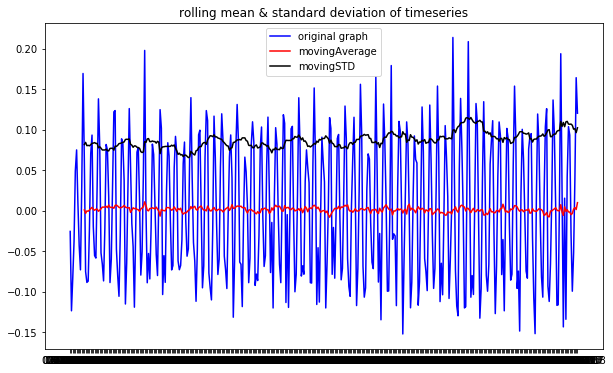

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [19]:
# We are dropping the NaN values, and the data_log_shift value here is 'd'
data_log_shift.dropna(inplace=True)
# using the same fuction call and plotting the graph.
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(data_log_shift)

The next step is to segregate the differentiated values to decompose, we use seasonal decompose method from stats model which segregates 3 components. Trend,Seasonality and residual. They are automatically calculated once the package gets imported.


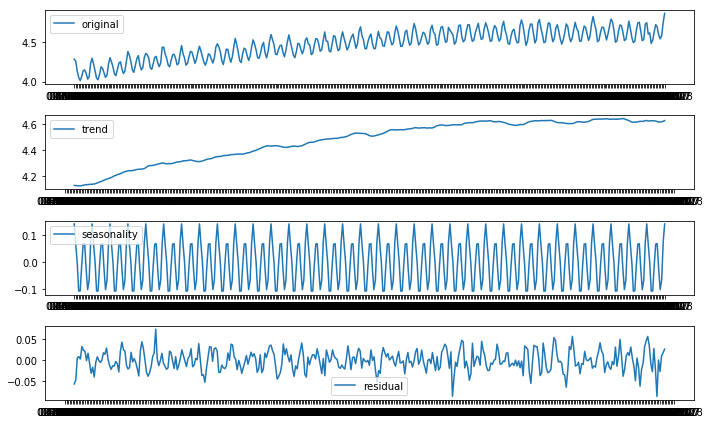

In [20]:
# !pip install statsmodels
# !pip install --upgrade patsy
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(data_logscale,model='additive', freq=12).plot()
#plotting the graphs induvidually
decomposition = seasonal_decompose(data_logscale,model='additive', freq=12)
trend = decomposition.trend
seasonality =decomposition.seasonal
# ensure that the residual method is just " resid "
# check the values inside the subplots are 411,412,413,414 which mean, there are 4 graphs in total(1st number in the value)
residual =decomposition.resid
plt.subplot(411)
plt.plot(data_logscale,label= 'original')
plt.legend(loc='best')
plt.plot()
plt.subplot(412)
plt.plot(trend,label= 'trend')
plt.legend(loc='best')
plt.plot();
# Trend is basically a relative high value or the low value over a particular time period. ( A newly opened shop)
plt.subplot(413)
plt.plot(seasonality,label= 'seasonality')
# Seasonality is a repeated pattern within fixed time period ( christmas )
plt.legend(loc='best')
plt.plot()
plt.subplot(414)
plt.plot(residual,label= 'residual')
plt.legend(loc='best')
plt.plot()
plt.tight_layout()



**Residual Error**

The difference between what was expected and what was predicted is called the residual error.

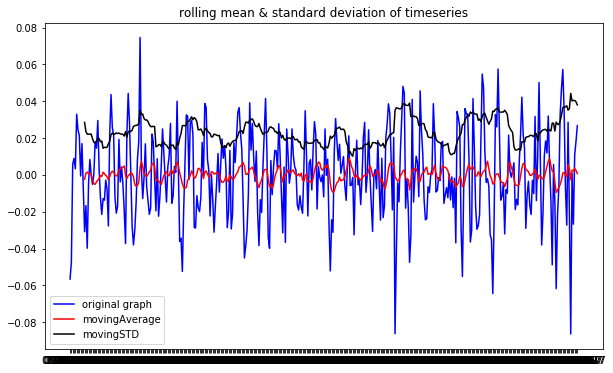

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [21]:
decomposed_logdata = residual
decomposed_logdata.dropna(inplace=True)
test_stationarity(decomposed_logdata)


plot acf  and pacf graphs ( auto corellation function and partially auto corellation function ). To find 'p' from p,d,q we need to use, PACF graphs and for 'q' use ACF graph. To plot these graphs, use ACF and PACF.

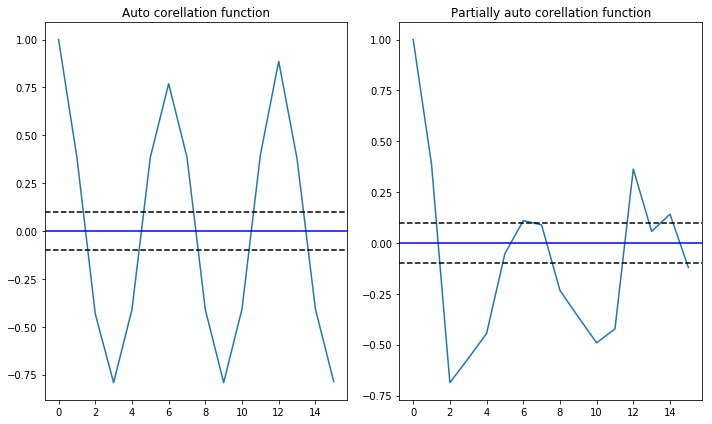

In [22]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value over here(data_log_shift)
acf = acf(data_log_shift, nlags=15)
pacf= pacf(data_log_shift, nlags=15,method='ols')

# ols stands for ordinary least squares used to minimise the errors

# 121 and 122 makes the data to look side by size 

#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()


#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()



In order to find the p and q values from the above graphs,we need to check where the graph cuts off the origin or drops to zero for the first time. From the above graphs the p and q values are merely close to 2 where the graph cuts off the orgin ( draw the line to x axis). Now we have p,d,q values. So now we can substitute in the ARIMA model where p and q values are 1 and 2 respectively.

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted a

RSS : 1.273784


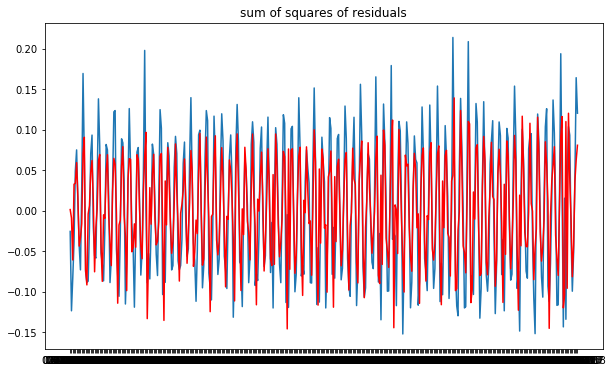

In [23]:
from statsmodels.tsa.arima_model import ARIMA

# calculating the AR model
model = ARIMA(data_logscale, order =(2,1,0))
# consider MA as 0 in MA_model
AR_result = model.fit()
plt.plot(data_log_shift)
plt.plot(AR_result.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((AR_result.fittedvalues-data_log_shift["value"])**2))

**Less the RSS more effective the model is.**

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted a

RSS : 1.273784


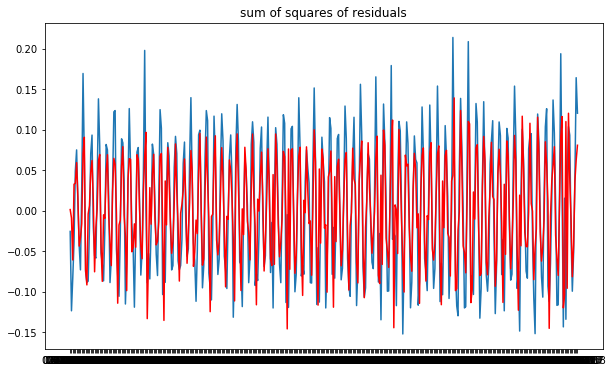

In [25]:
# calculating the MA model
model = ARIMA(data_logscale, order =(2,1,0))
# consider MA as 0 in MA_model
MA_result = model.fit()
plt.plot(data_log_shift)
plt.plot(MA_result.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((MA_result.fittedvalues-data_log_shift["value"])**2))


There is no need of finding the AR and MA values, this is just for our referrence, we already know the values of p,d,q. You can simply plot the ARIMA model and check for the results.


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RSS : 0.522661


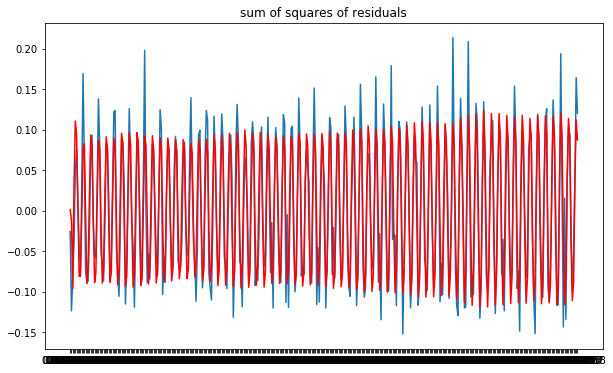

In [26]:
# calculating the ARIMA model
model = ARIMA(data_logscale, order =(3,1,3))
ARIMA_result = model.fit()
plt.plot(data_log_shift)
plt.plot(ARIMA_result.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((ARIMA_result.fittedvalues-data_log_shift["value"])**2))

In [27]:
# we founded the predicted values in the above code and we need to print the values in the form of series
ARIMA_predicts = pd.Series(ARIMA_result.fittedvalues,copy=True)
ARIMA_predicts.head()

date
02-01-1985    0.001381
03-01-1985   -0.012071
04-01-1985   -0.096126
05-01-1985    0.032675
06-01-1985    0.110766
dtype: float64

In [28]:
# finding the cummulative sum
ARIMA_predicts_cumsum = ARIMA_predicts.cumsum()
print(ARIMA_predicts_cumsum.head())

date
02-01-1985    0.001381
03-01-1985   -0.010691
04-01-1985   -0.106817
05-01-1985   -0.074141
06-01-1985    0.036625
dtype: float64


In [29]:
ARIMA_predicts_log = pd.Series(data_logscale['value'],index =data_logscale.index)
ARIMA_predicts_log = ARIMA_predicts_log.add(ARIMA_predicts_cumsum,fill_value=0)
print(ARIMA_predicts_log.head())

date
01-01-1985    4.283658
01-01-1986    4.418060
01-01-1987    4.448959
01-01-1988    4.543158
01-01-1989    4.538852
dtype: float64


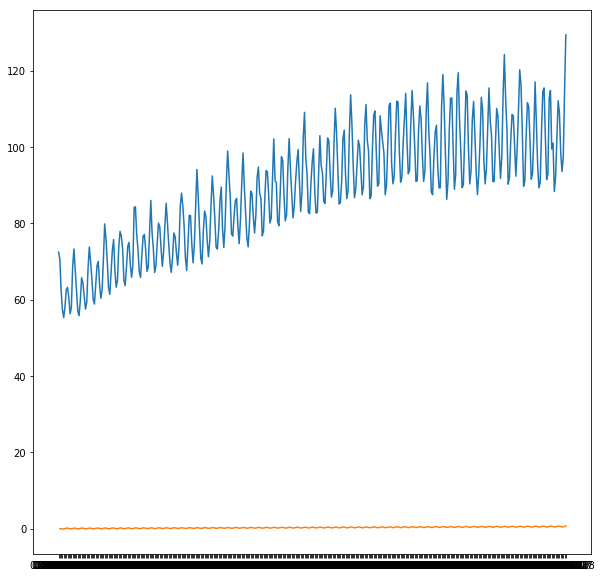

In [31]:
# converting back to the exponential form results in getting back to the original data.
ARIMA_final_preditcs = np.exp(ARIMA_predicts_log)
rcParams['figure.figsize']=10,10
plt.plot(data)
plt.plot(ARIMA_predicts_cumsum);

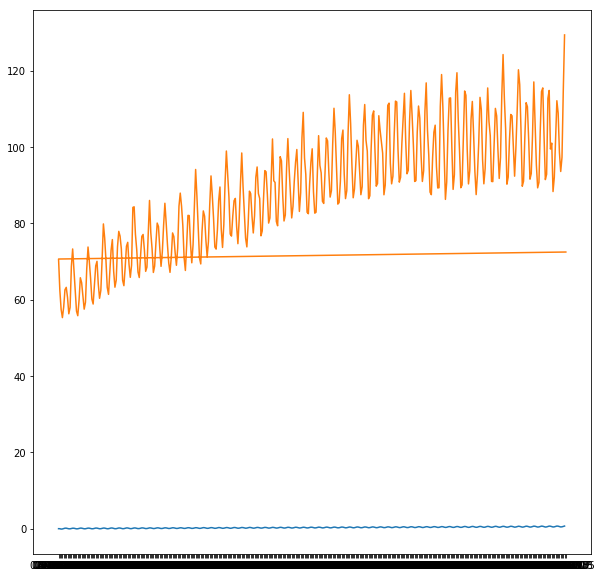

In [33]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,10
plt.plot(ARIMA_predicts_cumsum)
plt.plot(data);


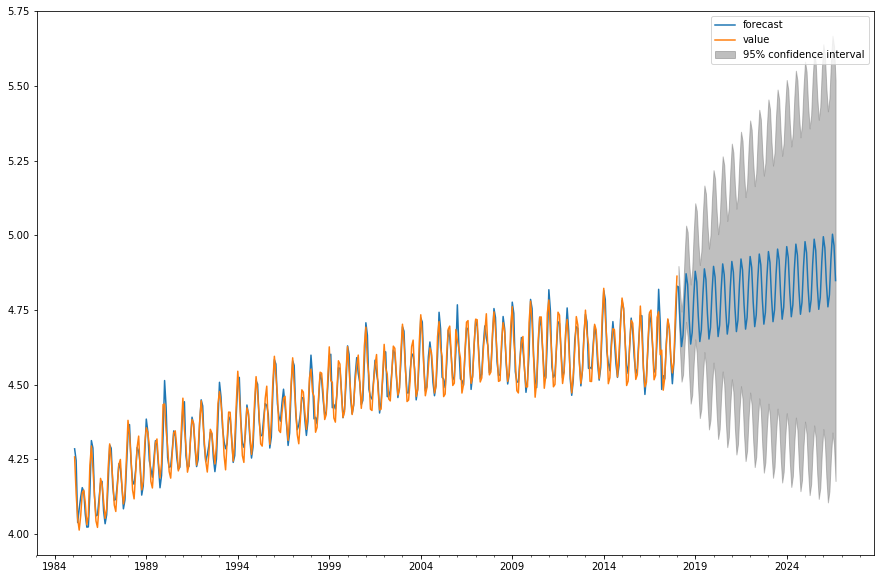

In [34]:
#future prediction
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10
ARIMA_result.plot_predict(1,500)
x=ARIMA_result.forecast(steps=200)

From the above graph, we calculated the future predictions till 2024. The greyed out area is the confidence interval wthe predictions will not cross that area.


In [35]:
# check the predicted values for ARIMA_result.plot_predict(1,500)
ARIMA_result.forecast(steps=200)

(array([4.82703329, 4.71343448, 4.62737965, 4.66601224, 4.78258049,
        4.87112169, 4.83528219, 4.72127692, 4.63576327, 4.67434154,
        4.7912978 , 4.87931539, 4.84351282, 4.72913703, 4.64413037,
        4.68268816, 4.79999836, 4.88752469, 4.85172704, 4.73701302,
        4.65248273, 4.69105035, 4.80868389, 4.89574791, 4.85992649,
        4.74490325, 4.66082195, 4.69942653, 4.81735592, 4.90398354,
        4.86811267, 4.75280626, 4.66914946, 4.70781531, 4.82601583,
        4.91223022, 4.8762869 , 4.76072076, 4.67746655, 4.71621541,
        4.83466486, 4.92048672, 4.88445039, 4.76864557, 4.68577437,
        4.72462571, 4.84330412, 4.92875198, 4.8926042 , 4.77657964,
        4.69407394, 4.7330452 , 4.85193459, 4.937025  , 4.90074929,
        4.78452204, 4.70236619, 4.74147296, 4.86055718, 4.94530492,
        4.90888652, 4.79247192, 4.71065195, 4.74990819, 4.86917266,
        4.95359094, 4.91701666, 4.80042854, 4.71893196, 4.75835016,
        4.87778177, 4.96188238, 4.92514041, 4.80

**Finally we calculated the units(value) of electricity which is going to be consumed in the coming future using time series analysis.**

**Thanks for looking into this. :)**